<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.1 Modelos deterministas de primer orden </h3>
<h3 style="text-align: center;"> Ejercicios propuestos</h3>



**Integrantes del grupo: Alejandro Bolaños García y David García Díaz**

En todos los ejercicios, obtener la solución exacta (analítica) y la simulada. 

### Ejercicio 1

Dadas las [estimaciones de población mundial](https://en.wikipedia.org/wiki/Estimates_of_historical_world_population) entre 1950 y 2016, encontrar un modelo de crecimiento poblacional lo más ajustado posible a los datos reales. Hallar la proyección de la población a largo plazo a partir del modelo. 

**(a)** Ajustar y validar el modelo a diversos modelos de crecimiento.
    
**(b)** Realización una proyección a largo plazo según modelo y estimar la población máxima mundial siguiendo ese patrón.   

**(c)** Discutir sobre la fiabilidad de los resultados.

#### 1. Modelo Exponencial

La fórmula para el crecimiento exponencial es:


$$ P(t) = P_0 e^{rt} $$


donde:
- $P(t) $ es la población en el tiempo $t $. 
- $P_0 $ es la población inicial en el tiempo $t = 0 $.
- $r $ es la tasa de crecimiento.
- $t $ es el tiempo transcurrido.

Este modelo asume un crecimiento continuo y constante en función del tiempo. La tasa de crecimiento no cambia, lo que resulta en un crecimiento ilimitado a lo largo del tiempo, lo cual para este tipo de problema no se trata de la mejor opción.


#### 2. Modelo Logístico

La ecuación del modelo logístico es:


$$ P(t) = \frac{P_{\text{max}}}{1 + A e^{-rt}} $$


donde:
- $ P(t) $ es la población en el tiempo $ t $.
- $ P_{\text{max}} $ es la capacidad máxima o capacidad de carga, que representa el valor límite al que la población se estabiliza.
- $ A $ es una constante que depende de las condiciones iniciales.
- $ r $ es la tasa de crecimiento.
- $ t $ es el tiempo transcurrido.

Este modelo describe un crecimiento limitado por los recursos disponibles. Inicialmente, la población crece rápidamente, pero la tasa de crecimiento disminuye a medida que se acerca a la capacidad máxima $ P_{\text{max}} $ .


#### 3. Modelo de Potencia

La ecuación para el modelo de potencia es:


$$ P(t) = a t^b $$


donde:
- $ P(t) $ es la población en el tiempo $ t $.
- $ a $ es una constante que determina la escala del crecimiento.
- $ b $ es el exponente que controla la forma de la curva de crecimiento.
- $ t $ es el tiempo transcurrido.

Este modelo asume que el crecimiento de la población sigue una relación de potencia con respecto al tiempo. La tasa de crecimiento cambia con el tiempo según el valor del exponente $ b $.


#### 4. Modelo de Gompertz

La fórmula del modelo de Gompertz es:


$$ P(t) = P_{\text{max}} e^{-e^{-r(t - t_0)}} $$


donde:
- $ P(t) $ es la población en el tiempo $ t $.
- $ P_{\text{max}} $ es la capacidad máxima o límite superior de la población.
- $ r $ es la tasa de crecimiento.
- $ t_0 $ es el tiempo en el cual la tasa de crecimiento es máxima.
- $ t $ es el tiempo transcurrido.

Este modelo describe un crecimiento sigmoidal (con forma de "S"), donde la tasa de crecimiento es máxima al principio y disminuye lentamente a medida que la población se acerca a la capacidad máxima $ P_{\text{max}} $.


#### 5. Modelo Malthusiano

La fórmula del modelo Malthusiano es:


$$ P(t) = P_0 e^{(r - m)t} $$


donde:
- $ P(t) $ es la población en el tiempo $ t $.
- $ P_0 $ es la población inicial en el tiempo $ t = 0 $.
- $ r $ es la tasa de crecimiento.
- $ m $ es la tasa de mortalidad o disminución de la población.
- $ t $ es el tiempo transcurrido.

Este modelo asume un crecimiento continuo con una tasa de cambio que depende del crecimiento $ r $ y de la mortalidad $ m $. La población crecerá si $ r > m $ y disminuirá si $ r < m $.


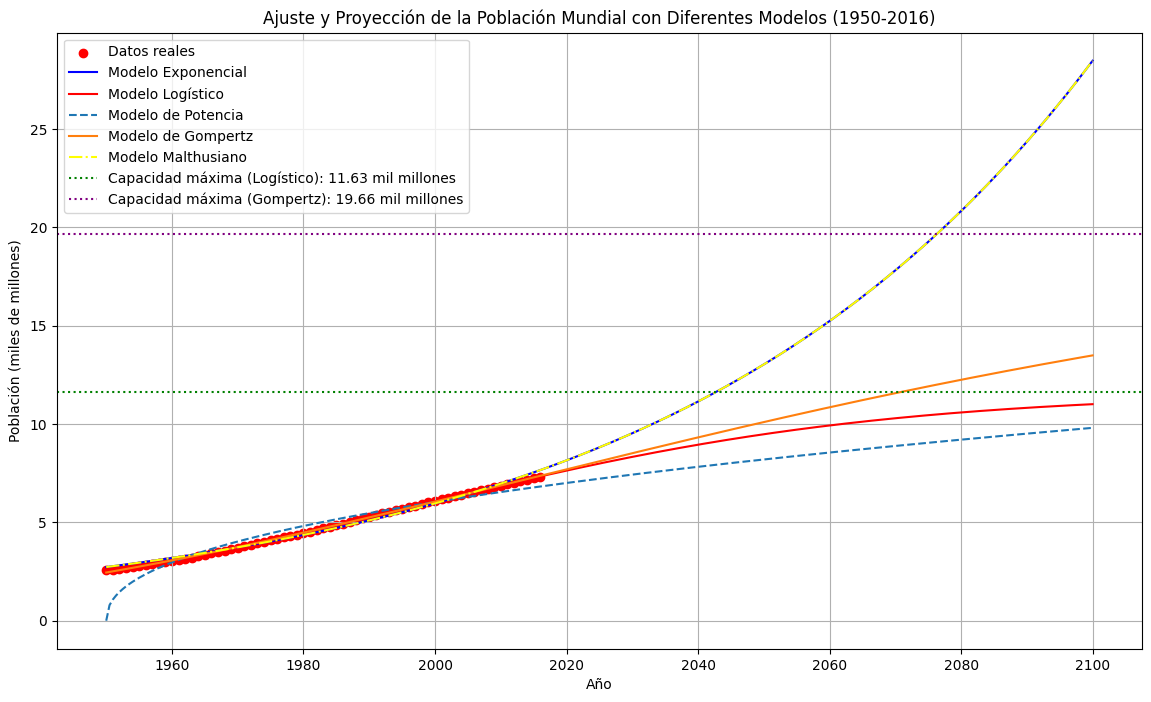

Modelo Exponencial: P0 = 2.73, r = 0.0156
Modelo Logístico: Pmax = 11.63, r = 0.0279, A = 3.6980
Modelo de Potencia: a = 1.0728, b = 0.4416
Modelo de Gompertz: Pmax = 19.66, r = 0.0114, t0 = 64.33
Modelo Malthusiano: P0 = 2.73, r = -15.0749, m = -15.0906


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de población mundial (1950-2016), en miles de millones
years = np.arange(1950, 2017)
population = np.array([
    2557628654, 2594939877, 2636772306, 2682053389, 2730228104, 2782098943,
    2835299673, 2891349717, 2948137248, 3000716593, 3043001508, 3083966929,
    3140093217, 3209827882, 3281201306, 3350425793, 3420677923, 3490333715,
    3562313822, 3637159050, 3712697742, 3790326948, 3866568653, 3942096442,
    4016608813, 4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
    4451362735, 4534410125, 4614566561, 4695736743, 4774569391, 4856462699,
    4940571232, 5027200492, 5114557167, 5201440110, 5288955934, 5371585922,
    5456136278, 5538268316, 5618682132, 5699202985, 5779440593, 5857972543,
    5935213248, 6012074922, 6088571383, 6165219247, 6242016348, 6318590956,
    6395699509, 6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
    6858584755, 6935999491, 7013871313, 7092128094, 7169968185, 7247892788,
    7325996709
]) / 1e9  # Convertir a miles de millones

# Verificar que el número de años coincide con los datos de población
assert len(years) == len(population), "El número de años y datos de población no coincide."

# Transformar los años a tiempo relativo (desde 1950) para el ajuste, pero usaremos años reales en la gráfica
t = years - 1950

# Funciones para los diferentes modelos
def exponential_model(t, P0, r):
    return P0 * np.exp(r * t)

def logistic_model(t, Pmax, r, A):
    return Pmax / (1 + A * np.exp(-r * t))

def power_model(t, a, b):
    return a * (t ** b)

def gompertz_model(t, Pmax, r, t0):
    return Pmax * np.exp(-np.exp(-r * (t - t0)))

def malthusian_model(t, P0, r, m):
    return P0 * np.exp((r - m) * t)

# Ajuste de los modelos, valores iniciales más apropiados para cada modelo
params_exp, _ = curve_fit(exponential_model, t, population, p0=[2.5, 0.02]) # P0 = 2.5, r = 0.02
params_log, _ = curve_fit(logistic_model, t, population, p0=[10, 0.02, 1]) # Pmax = 10, r = 0.02, A = 1
params_power, _ = curve_fit(power_model, t, population, p0=[1, 0.5]) # a = 1, b = 0.5
params_gompertz, _ = curve_fit(gompertz_model, t, population, p0=[10, 0.02, 50]) # Pmax = 10, r = 0.02, t0 = 50
params_malthus, _ = curve_fit(malthusian_model, t, population, p0=[2.5, 0.02, 0.01]) # P0 = 2.5, r = 0.02, m = 0.01

# Proyecciones usando los modelos ajustados
t_proj = np.linspace(0, 150, 300)  # Proyección hasta 2100 (150 años desde 1950)
years_proj = t_proj + 1950  # Convertir tiempo relativo a años reales

pop_exp_proj = exponential_model(t_proj, *params_exp)
pop_log_proj = logistic_model(t_proj, *params_log)
pop_power_proj = power_model(t_proj, *params_power)
pop_gompertz_proj = gompertz_model(t_proj, *params_gompertz)
pop_malthus_proj = malthusian_model(t_proj, *params_malthus)

# Gráfico de los ajustes y proyecciones
plt.figure(figsize=(14, 8))
plt.scatter(years, population, color='red', label='Datos reales')
plt.plot(years_proj, pop_exp_proj, label='Modelo Exponencial', linestyle='-', color='blue')
plt.plot(years_proj, pop_log_proj, label='Modelo Logístico', linestyle='-', color='red')
plt.plot(years_proj, pop_power_proj, label='Modelo de Potencia', linestyle='--')
plt.plot(years_proj, pop_gompertz_proj, label='Modelo de Gompertz', linestyle='-')
plt.plot(years_proj, pop_malthus_proj, label='Modelo Malthusiano', linestyle='-.', color='yellow')

# Añadir líneas horizontales para las capacidades máximas calculadas por los modelos logísticos y Gompertz
plt.axhline(y=params_log[0], color='green', linestyle=':', label=f'Capacidad máxima (Logístico): {params_log[0]:.2f} mil millones')
plt.axhline(y=params_gompertz[0], color='purple', linestyle=':', label=f'Capacidad máxima (Gompertz): {params_gompertz[0]:.2f} mil millones')

# Configurar el gráfico
plt.xlabel('Año')
plt.ylabel('Población (miles de millones)')
plt.title('Ajuste y Proyección de la Población Mundial con Diferentes Modelos (1950-2016)')
plt.legend()
plt.grid(True)
plt.show()

# Parámetros ajustados para cada modelo
print(f"Modelo Exponencial: P0 = {params_exp[0]:.2f}, r = {params_exp[1]:.4f}")
print(f"Modelo Logístico: Pmax = {params_log[0]:.2f}, r = {params_log[1]:.4f}, A = {params_log[2]:.4f}")
print(f"Modelo de Potencia: a = {params_power[0]:.4f}, b = {params_power[1]:.4f}")
print(f"Modelo de Gompertz: Pmax = {params_gompertz[0]:.2f}, r = {params_gompertz[1]:.4f}, t0 = {params_gompertz[2]:.2f}")
print(f"Modelo Malthusiano: P0 = {params_malthus[0]:.2f}, r = {params_malthus[1]:.4f}, m = {params_malthus[2]:.4f}")


#### Conclusiones

Como conclusiones relacionadas con los diferentes modelos utilizados para el crecimiento de la población:


**Exponencial y Malthusiano:** Los modelos exponencial y Malthusiano asumen un crecimiento continuo sin considerar las limitaciones reales del entorno, como los recursos limitados, cambios en las políticas, o eventos globales como pandemias. Dado que estos modelos no incluyen un límite superior de población, su fiabilidad a largo plazo es limitada. La proyección basada en un crecimiento exponencial continuo resulta poco realista, ya que el crecimiento poblacional en la vida real no puede ser indefinido.


**Modelo de Potencia:** Este modelo captura una tasa de crecimiento que puede acelerarse o desacelerarse con el tiempo. Su forma es más flexible que la del modelo exponencial, pero tampoco incluye un límite máximo para la población, lo que puede limitar su fiabilidad para proyecciones a muy largo plazo.


**Logístico y Gompertz:** Estos modelos incluyen una capacidad máxima $ P_{\text{max}} $ que refleja las limitaciones naturales de los recursos y espacio. Son más realistas en términos de cómo las poblaciones tienden a estabilizarse a largo plazo. Sin embargo, la capacidad máxima es un parámetro ajustado con base en datos históricos y puede no ser precisa si ocurren cambios drásticos en factores como la tecnología, la economía o el medio ambiente. Además, el momento en el que se alcanza esta capacidad máxima es difícil de predecir con exactitud.

De manera que estos últimos modelos tienen ese componente realista al valorar la escasez de recursos lo cual los hace más fiables. Por otro lado consideramos que quizás se podría intentar introducir la variable de la mortalidad utilizada en el modelo Malthusiano y comprobar y ver como se comporta el modelo descubriendo si tiene o no utilidad el uso de esta nueva variable.

### Ejercicio 2

Sea un objeto con una temperatura inicial $T_0$ situado en un entorno a temperatura ambiente. En cada minuto $t$, el objeto se enfría/calienta a una tasa $\alpha$ de la diferencia entre la temperatura $T(t)$ del objeto y la temperatura ambiente $T_e$. Simular el proceso de enfriamiento/calentamiento para distintos valores de los parámetros. Encontrar el momento en el que la temperatura del objeto alcanza la mitad de la diferencia inicial de temperatura con el ambiente. ¿Se alcanza la temperatura ambiental a largo plazo? Si no, ¿por qué no?


#### Modelo matemático
Para realizar un modelo de este problema se utiliza la ley de enfriamiento de Newton, que se expresa como:

$$ \frac{dT(t)}{dt} = -\alpha \left[ T(t) - T_e \right]$$

- $T(t)$ es la temperatura del objeto en el tiempo $t$.
- $T_e $ es la temperatura ambiente. 
- $\alpha$ es la tasa de enfriamiento.

##### Solución general
La solución de esta ecuación diferencial con la condición inicial $( T(0) = T_0 )$ es:


$$ T(t) = T_e + (T_0 - T_e) e^{-\alpha t} $$


Esta fórmula describe cómo la temperatura cambia con el tiempo, acercándose asintóticamente a la temperatura ambiente $T_e$.


##### Momento en el que alcanza la mitad de la diferencia inicial
Queremos encontrar $t$ cuando la temperatura es la mitad de la diferencia inicial:


$$ T(t) = T_e + \frac{T_0 - T_e}{2} $$


Sustituimos en la solución general:


$$ T_e + \frac{T_0 - T_e}{2} = T_e + (T_0 - T_e) e^{-\alpha t} $$


Simplificamos y despejamos $t$:


$$ \frac{1}{2} = e^{-\alpha t} \implies t = \frac{\ln 2}{\alpha} $$


##### Conclusión
La temperatura del objeto se aproxima a la temperatura ambiente $T_e$ a medida que pasa el tiempo, pero nunca la alcanza exactamente el valor de debido a la naturaleza exponencial de la función, pudiéndose apreciar esto en la gráfica siguiente:


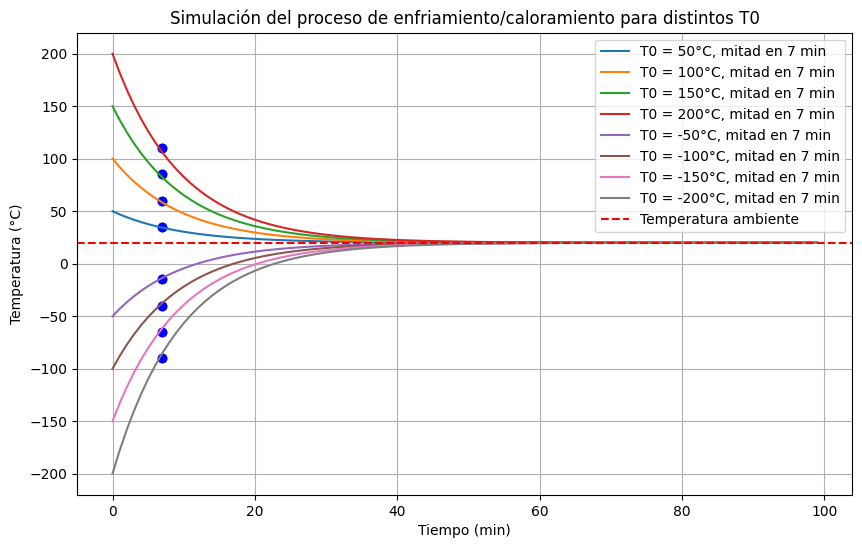

In [14]:
import numpy as np
import matplotlib.pyplot as plt

T0_values = [50, 100, 150, 200, -50, -100, -150, -200]  # Diferentes temperaturas iniciales
Te = 20  # Temperatura ambiente
alpha = 0.1  # Tasa de enfriamiento/caloramiento
dt = 1  # Intervalo de tiempo en minutos
time_steps = 100  # Número de minutos a simular

# Inicialización del vector de tiempos
times = np.arange(0, time_steps, dt)

# Simulación para diferentes T0
plt.figure(figsize=(10, 6))
for T0 in T0_values:
    # Inicialización de temperaturas
    temperatures = np.zeros(len(times), dtype=float)
    temperatures[0] = T0

    # Simulación numérica
    for i in range(1, len(times)):
        temperatures[i] = temperatures[i-1] - alpha * (temperatures[i-1] - Te) * dt
        if temperatures[i] == Te:
            print(f'T0 = {T0}°C, tiempo de equilibrio en {times[i]} min')

    # Encontrar el tiempo en el que la temperatura alcanza la mitad de la diferencia inicial
    if T0 > Te:
        half_temp = Te + (T0 - Te) / 2
        half_time_index = np.where(temperatures <= half_temp)[0][0]
    else:
        half_temp = Te - (Te - T0) / 2
        half_time_index = np.where(temperatures >= half_temp)[0][0]

    half_time = times[half_time_index]
    #print(f'T0 = {T0}°C, mitad de la diferencia inicial de temperatura con el ambiente en {half_time} min')
    
    # Gráfico de la simulación
    plt.plot(times, temperatures, label=f'T0 = {T0}°C, mitad en {half_time} min')
    plt.scatter(half_time, half_temp, color='b')
    plt.scatter(half_time, half_temp, color='b')

# Gráfica común
plt.axhline(y=Te, color='r', linestyle='--', label='Temperatura ambiente')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Simulación del proceso de enfriamiento/caloramiento para distintos T0')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 3

Supóngase una cooperativa que dispone de una nave donde acumula cantidades de un solo producto para abastecer a sus asociados cuando lo requieran. El procedimiento de abastacimiento y reposición es el siguiente. La cooperativa fija un volumen de $K^*$ unidades de producto como la cantidad deseada a mantener en stock. Cada semana $t$, la cooperativa compara el volumen actual de stock $K(t)$ con el deseado y manda a pedir más unidades de ese producto, que llegan a lo largo de la semana. Se estima que en una semana llega una tasa $\alpha$ de todos los pedidos de la semana anterior. La cooperativa puede modificar los pedidos en cada instante del tiempo, cancelando los anteriores. Se asume una situación inicial de $K^*$ unidades en stock, y cada semana recibe una petición fija por parte de sus asociados de $A$ unidades de producto, distribuidos homogéneamente a lo largo de la semana. Estimar el stock de la cooperativa a largo plazo para distintos valores de  los parámetros. Proponer una nueva forma de reponer el producto para que mantenga un stock deseado lo más cercano a $K^*$ unidades.

Notación y supuestos:
- $ K(t) $: Nivel de stock en la semana $(t)$.
- $ K^* $: Nivel deseado de stock.
- $ A $ : Cantidad fija de producto solicitada por los asociados cada semana.
- $ \alpha$: Tasa de llegada de los pedidos en una semana.
- $ P(t) $ : Pedido realizado en la semana $(t)$.


El modelo asume que:

- Al inicio el nivel de stock es $K(0) = K^*$
- La cooperativa realiza pedidos semanales en función de la diferencia entre el nivel actual y el nivel deseado.
- Cada semana, una fracción $ (\alpha) $ del pedido de la semana anterior llega a la cooperativa.
- Los asociados retiran una cantidad fija $ (A) $ del stock, distribuida uniformemente durante la semana.

**Modelo dinámico:** La tasa de cambio del stock durante una semana se puede expresar como:

$$
\frac{dK(t)}{dt} = \alpha \left[ K^* - K(t) \right] - A
$$

- $ \alpha \left[ K^* - K(t) \right] $: Representa la reposición de stock. Es proporcional a la diferencia entre el stock deseado y el stock actual, modelando un proceso de retroalimentación para acercar el nivel de stock a $( K^* ).$

- $ -A $: Es la retirada fija de producto por los asociados.


Para encontrar el nivel de stock a largo plazo, debemos resolver la ecuación diferencial anterior en el estado estacionario:

$$
0 = \alpha \left[ K^* - K(t) \right] - A
$$

Resolviendo para $ K(t) $:

$$
K(t) = K^* - \frac{A}{\alpha}
$$

Esto implica que, a largo plazo, el nivel de stock se estabilizará en un valor que depende de la tasa de llegada de pedidos $(\alpha)$ y la demanda semanal $(A)$. Para que el stock esté lo más cercano posible a $(K^*)$, la tasa $(\alpha )$ debe ser lo suficientemente alta en relación con $(A)$.



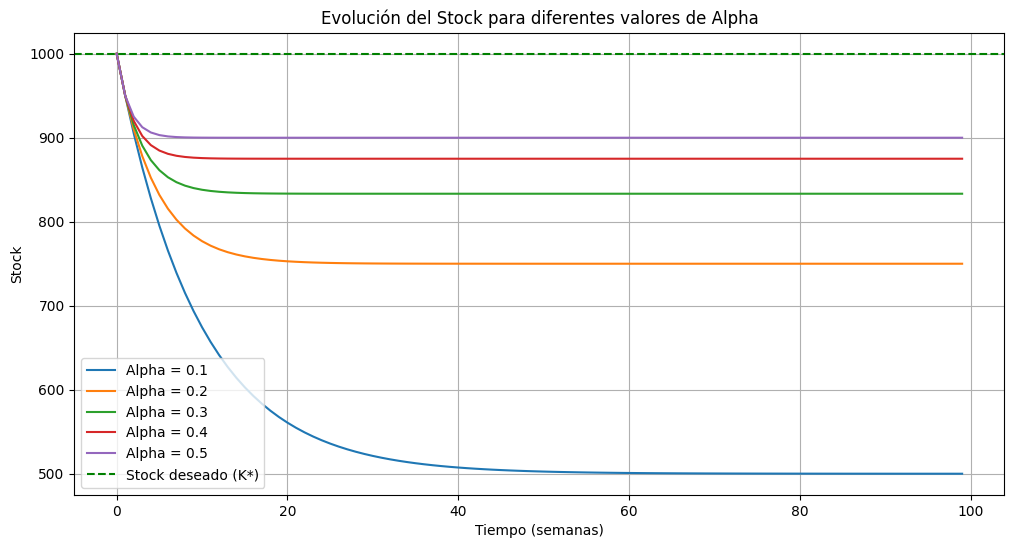

In [4]:
# Importar las bibliotecas necesarias (corrigiendo el error anterior)
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
K_star = 1000  # Nivel deseado de stock
A = 50  # Cantidad fija de producto retirada semanalmente
delta_t = 1  # Intervalo de tiempo (semanas)

# Definir nuevos valores para alpha (sin el parámetro beta)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Tiempo total para alcanzar el estado estacionario
tiempo_total = 100  # semanas

# Almacenar los resultados
tiempo = np.arange(tiempo_total)
stock_evoluciones = np.zeros((len(alpha_values), tiempo_total))

# Simulación para distintos valores de alpha sin el control integral
for i, alpha in enumerate(alpha_values):
    # Inicializar variables
    K = np.zeros(tiempo_total)  # Nivel de stock
    P = np.zeros(tiempo_total)  # Pedidos
    K[0] = K_star  # Nivel inicial de stock

    # Simulación a lo largo del tiempo
    for t in range(1, tiempo_total):
        error_actual = K_star - K[t-1]
        P[t] = alpha * error_actual  # Control proporcional sin el término integral
        K[t] = K[t-1] + P[t] - A

    # Almacenar la evolución del stock para cada valor de alpha
    stock_evoluciones[i, :] = K

# Representación gráfica de los resultados
plt.figure(figsize=(12, 6))
for i, alpha in enumerate(alpha_values):
    plt.plot(tiempo, stock_evoluciones[i, :], label=f'Alpha = {alpha:.1f}')

plt.axhline(y=K_star, color='green', linestyle='--', label='Stock deseado (K*)')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Stock')
plt.title('Evolución del Stock para diferentes valores de Alpha')
plt.legend()
plt.grid(True)
plt.show()


Para mejorar la forma en que calculamos el nivel deseado de stock $( K^*)$, podemos redefinirlo como una función dependiente de otros parámetros del sistema, como la tasa de consumo $(A)$ y la tasa de llegada de pedidos $( \alpha )$. Esto permitirá que el nivel de stock se ajuste automáticamente de manera más inteligente en función de las condiciones.

$$
K^* = \frac{A}{\alpha}
$$

Este ajuste asegura que el nivel de stock deseado sea suficiente para cubrir la demanda $( A )$ en función de la tasa de reposición $( \alpha )$.


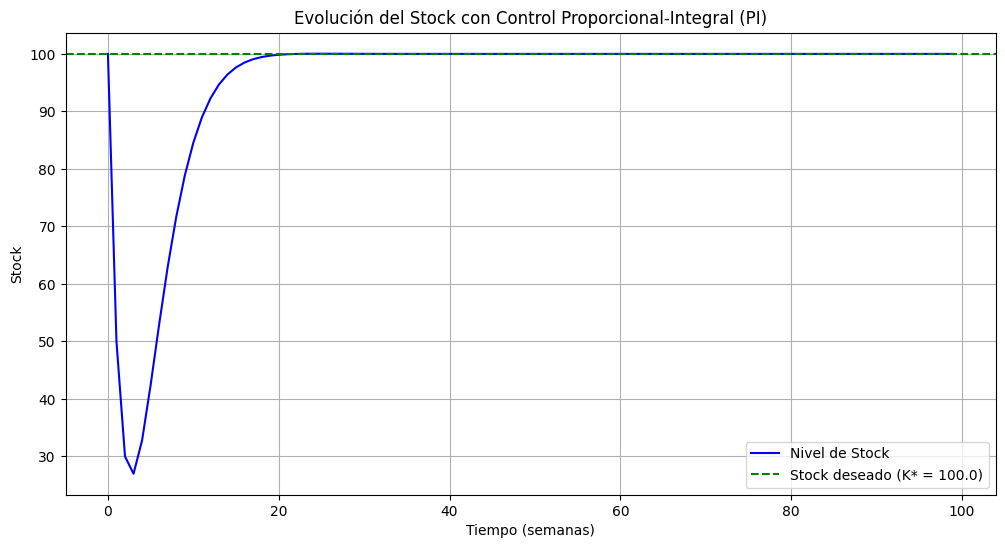

In [28]:
# Parámetros del problema
A = 50  # Cantidad fija de producto retirada semanalmente
alpha = 0.5  # Tasa de llegada de pedidos
beta = 0.1  # Constante de control integral
tiempo_total = 100  # Número de semanas
delta_t = 1  # Intervalo de tiempo (semanas)

# Nuevo cálculo de K_star basado en A y alpha
K_star = A / alpha 

# Inicializar variables
K = np.zeros(tiempo_total)  # Almacena el stock en cada semana
P = np.zeros(tiempo_total)  # Almacena los pedidos en cada semana
error_integral = 0  # Error acumulado
K[0] = K_star  # Condición inicial

# Simulación a lo largo del tiempo
for t in range(1, tiempo_total):
    # Calcular el error actual
    error_actual = K_star - K[t-1]
    
    # Acumular el error integral
    error_integral += error_actual * delta_t
    
    # Calcular el pedido basado en el control proporcional-integral
    P[t] = alpha * error_actual + beta * error_integral
    
    # Actualizar el stock para la semana actual
    K[t] = K[t-1] + P[t] - A

# Representación gráfica
plt.figure(figsize=(12, 6))
plt.plot(np.arange(tiempo_total), K, label='Nivel de Stock', color='blue')
plt.axhline(y=K_star, color='green', linestyle='--', label=f'Stock deseado (K* = {K_star:.1f})')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Stock')
plt.title('Evolución del Stock con Control Proporcional-Integral (PI)')
plt.legend()
plt.grid(True)
plt.show()
